#Data Wrangling with Pandas

[Aj. NesT the Series](http://bit.ly/ajnesttheseriesSubscribe)

Referenence: [Pyhton Data Cleaning Cookbook 2020](https://github.com/PacktPublishing/Python-Data-Cleaning-Cookbook)

##Practice 1: เช็คคุณภาพข้อมูลและทำความสะอาดข้อมูล

Measuring Data Quality and Data Cleaning of Your Data 

##Workshop 5: การสร้าง Summary Statistics สำหรับ Continuous Variables
--> Generating summary statistics for continuous
variables

###Input Datasets

* **[covidtotals.csv](https://drive.google.com/file/d/1xwJwA-HUKO39KDjuDeJiz4kou7plkTZK/view?usp=sharing)** - COVID-19 case data 1 June 2020. 

####Question 5: เราจะสำรวจวิธีการเลือกและจัดระเบียบให้กับคอลัมน์

**STEP 1:** นำเข้า Datasets โดยทำการ Upload covidtotals.csv ขึ้น Google Colab (ไฟล์นี้จะถูกลบเมื่อเราหลุดจาก Session หรือปิด Browser) หรือ Python IDE เช่น PyCharm, VSCode, Juputer Notebook, etc.

**STEP 2:** นำเข้า pandas, numpy และ matplotlib libraries

**STEP 3:** ทำการอ่านไฟล์ .csv ด้วย pandas เก็บเป็น Dataframe และตั้งคอลัมน์ 'lastdate' เป็น datetime data type

ใช้คำสั่ง .read_csv() และ parse_dates=[ 'lastdate' ]

**STEP 4:** ตั้งค่าและแสดง index และ size ของ nls97 data

ใช้คำสั่ง set_index()

**STEP 5:** แสดงจำนวน data types และ non-null value

ใช้คำสั่ง info()

**STEP 6:** แสดงจำนวน rows และ columns

ใช้คำสั่ง .shape

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #เพิ่ม matplotlib เข้ามาใช้สร้าง data visualization
covidtotals = pd.read_csv("/content/covidtotals.csv", parse_dates=['lastdate'])
covidtotals.set_index("iso_code", inplace=True)
print(covidtotals)
print(covidtotals.info())
print(covidtotals.shape)
#คำสั่ง parse_dates จะทำการแปลง Column 'lastdate' ให้เป็น Datetime Type วันเดือนปี เพื่อให้สามารถนำไปเปรียบเทียบช่วงเวลาได้

           lastdate        location  ...  gdp_per_capita  hosp_beds
iso_code                             ...                           
AFG      2020-06-01     Afghanistan  ...        1803.987       0.50
ALB      2020-06-01         Albania  ...       11803.431       2.89
DZA      2020-06-01         Algeria  ...       13913.839       1.90
AND      2020-06-01         Andorra  ...             NaN        NaN
AGO      2020-06-01          Angola  ...        5819.495        NaN
...             ...             ...  ...             ...        ...
VNM      2020-06-01         Vietnam  ...        6171.884       2.60
ESH      2020-06-01  Western Sahara  ...             NaN        NaN
YEM      2020-06-01           Yemen  ...        1479.147       0.70
ZMB      2020-06-01          Zambia  ...        3689.251       2.00
ZWE      2020-06-01        Zimbabwe  ...        1899.775       1.70

[210 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, AFG to ZWE
Data columns (total 11

**STEP 7:** ทบทวนคำสั่ง ทดลองทำการสุ่มข้อมูล ปรับแต่ง และแสดง data types

look at a few rows of the covid cases data

ใช้คำสั่ง .sample(), .T, .dtypes

In [ ]:
print(covidtotals.sample(2, random_state=1))
print(covidtotals.sample(2, random_state=1).T)
print(covidtotals.dtypes)

           lastdate  location  ...  gdp_per_capita  hosp_beds
iso_code                       ...                           
COG      2020-06-01     Congo  ...        4881.406        NaN
THA      2020-06-01  Thailand  ...       16277.671        2.1

[2 rows x 11 columns]
iso_code                         COG                  THA
lastdate         2020-06-01 00:00:00  2020-06-01 00:00:00
location                       Congo             Thailand
total_cases                      611                 3081
total_deaths                      20                   57
total_cases_pm               110.727                44.14
total_deaths_pm                3.624                0.817
population               5.51809e+06             6.98e+07
pop_density                   15.405              135.132
median_age                        19                 40.1
gdp_per_capita               4881.41              16277.7
hosp_beds                        NaN                  2.1
lastdate           datetime64[ns]

**STEP 8:** แสดงข้อมูล Descriptive Statistics และข้อมูลสะสม Cumulative Values

Get descriptive statistics on the cumulative values

ใช้คำสั่ง .describe()

In [ ]:
print(covidtotals.describe())

        total_cases   total_deaths  ...  gdp_per_capita   hosp_beds
count  2.100000e+02     210.000000  ...      182.000000  164.000000
mean   2.921614e+04    1770.714286  ...    19539.154588    3.012671
std    1.363978e+05    8705.565857  ...    19862.354091    2.464917
min    0.000000e+00       0.000000  ...      661.240000    0.100000
25%    1.757500e+02       4.000000  ...     4485.329000    1.300000
50%    1.242500e+03      25.500000  ...    13183.081500    2.358500
75%    1.011700e+04     241.250000  ...    28556.527250    3.895750
max    1.790191e+06  104383.000000  ...   116935.600000   13.800000

[8 rows x 9 columns]


**STEP 9:** แสดงค่าการกระจายตัวของข้อมูล

ใช้คำสั่ง np.arrange( ) --> numpy.arange(start, stop, step, dtype) ระยะห่างของข้อมูล


In [ ]:
totvars = ['location','total_cases','total_deaths','total_cases_pm','total_deaths_pm']
print(covidtotals[totvars].quantile(np.arange(0.0, 1.1, 0.1)))

     total_cases  total_deaths  total_cases_pm  total_deaths_pm
0.0          0.0           0.0          0.8940           0.0000
0.1         22.9           0.0         18.4870           0.0000
0.2        105.2           2.0         56.7386           0.4008
0.3        302.0           6.7        118.2282           1.7348
0.4        762.0          12.0        214.9182           3.9734
0.5       1242.5          25.5        281.9970           6.2140
0.6       2514.6          54.6        546.0534          12.5644
0.7       6959.8         137.2       1074.0324          26.0638
0.8      16847.2         323.2       2208.7374          50.2896
0.9      46513.1        1616.9       3771.9956         139.5290
1.0    1790191.0      104383.0      19771.3480        1237.5510


**STEP 10:** แสดงการกระจายตัวของข้อมูล

View the distribution of total cases

ใช้คำสั่งของ matplotlib .hist สร้างภาพข้อมูล histogram

สังเกตอะไรได้ในชุดข้อมูลนี้ ข้อมูล 01/06/2020

จำนวนประเทศส่วนใหญ่มี covid cases < 200,000 กราฟกระจายสูงขึ้นไปทางขวา 

และประเทศส่วนน้อยที่มี covid cases > 200,000 กราฟจะกระจายตัวไปทางซ้าย

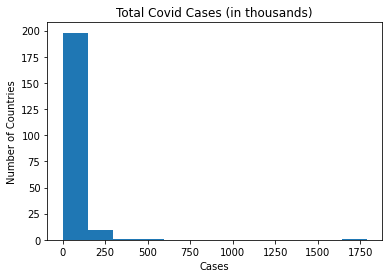

In [ ]:
plt.hist(covidtotals['total_cases']/1000, bins=12)
plt.title("Total Covid Cases (in thousands)")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()